# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

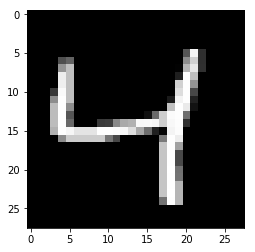

In [8]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [37]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

inputs_ = tf.placeholder(tf.float32, shape=(None, mnist.train.images.shape[1]), name='inputs')
targets_ = tf.placeholder(tf.float32, shape=(None, mnist.train.images.shape[1]), name='tragets')

# Output of hidden layer
# encoded = tf.layers.dense(inputs_, encoding_dim, activation='ReLU')
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, units=(mnist.train.images.shape[1]), activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='outputs')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

## Training

In [38]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [40]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6940
Epoch: 1/20... Training loss: 0.6907
Epoch: 1/20... Training loss: 0.6877
Epoch: 1/20... Training loss: 0.6842
Epoch: 1/20... Training loss: 0.6801
Epoch: 1/20... Training loss: 0.6745
Epoch: 1/20... Training loss: 0.6681
Epoch: 1/20... Training loss: 0.6609
Epoch: 1/20... Training loss: 0.6515
Epoch: 1/20... Training loss: 0.6395
Epoch: 1/20... Training loss: 0.6286
Epoch: 1/20... Training loss: 0.6170
Epoch: 1/20... Training loss: 0.6006
Epoch: 1/20... Training loss: 0.5872
Epoch: 1/20... Training loss: 0.5711
Epoch: 1/20... Training loss: 0.5547
Epoch: 1/20... Training loss: 0.5409
Epoch: 1/20... Training loss: 0.5206
Epoch: 1/20... Training loss: 0.5057
Epoch: 1/20... Training loss: 0.4844
Epoch: 1/20... Training loss: 0.4716
Epoch: 1/20... Training loss: 0.4494
Epoch: 1/20... Training loss: 0.4363
Epoch: 1/20... Training loss: 0.4205
Epoch: 1/20... Training loss: 0.4022
Epoch: 1/20... Training loss: 0.3897
Epoch: 1/20... Training loss: 0.3766
E

Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1828
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1956
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1804
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1789
Epoch: 1/20... Training loss: 0.1850
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1850
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1838
Epoch: 1/20... Training loss: 0.1821
Epoch: 1/20... Training loss: 0.1840
Epoch: 1/20... Training loss: 0.1834
E

Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1614
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1467
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1484
Epoch: 2/20... Training loss: 0.1486
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1504
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1594
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1493
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1512
E

Epoch: 3/20... Training loss: 0.1302
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1308
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1288
E

Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1220
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1259
E

Epoch: 4/20... Training loss: 0.1107
Epoch: 4/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1158
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1179
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1164
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1153
E

Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1039
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1039
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1025
Epoch: 5/20... Training loss: 0.1054
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1034
Epoch: 5/20... Training loss: 0.1036
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1054
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1059
E

Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.0990
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.0996
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1002
Epoch: 6/20... Training loss: 0.1054
E

Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0951
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0980
E

Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.0965
E

Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0917
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0945
E

Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.093

Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0915
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0907
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0895
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0895
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0903
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0971
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.1005
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0961
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0894
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0987
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0921
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0971
Epoch: 17/20... Training loss: 0.0891
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0893
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0964
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0894
Epoch: 18/20... Training loss: 0.0878
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0904
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0886
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0895
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0897
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0891
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0971
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0889
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0897
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0971
Epoch: 20/20... Training loss: 0.0896
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0890
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0888
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

In [35]:
tf.Session.run?

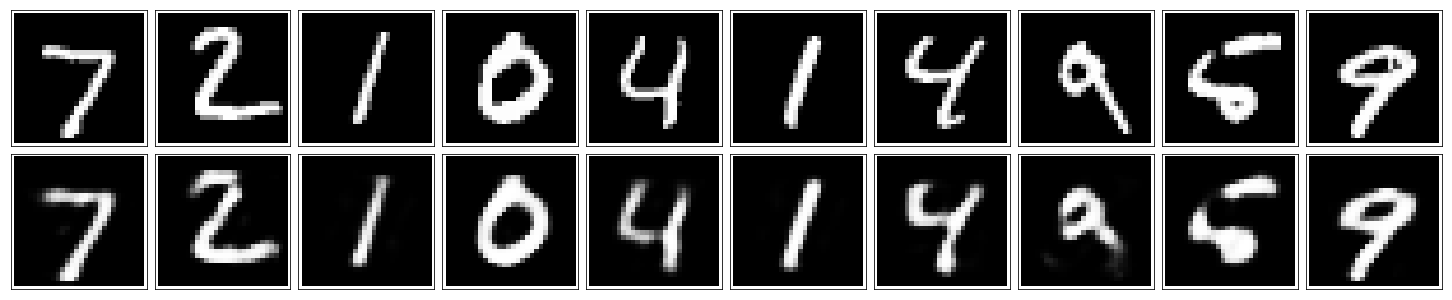

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [34]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.